In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd


In [ ]:
import soundfile as sf
import subprocess
import os
import random
from pathlib import Path
import torch.nn as nn

In [ ]:
from features import extract_segments_and_log
from features import extract_segments_and_logmp3
from features import extract_segments_and_logmp4

In [ ]:
from dataset import AudioDataset
from model import CNNWithGAP

In [ ]:
y, sr = librosa.load("/content/gdrive/MyDrive/VESSELS/ShippingNoise2KHz.wav", sr=48000)

In [ ]:



S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel', fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.show()


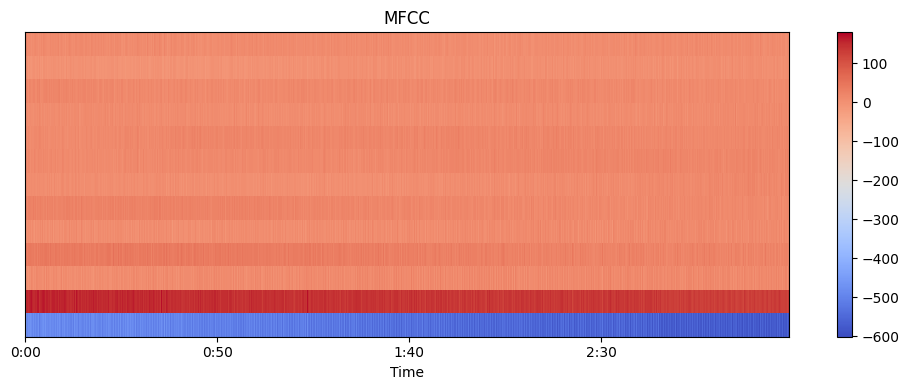

In [ ]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time', sr=sr)
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

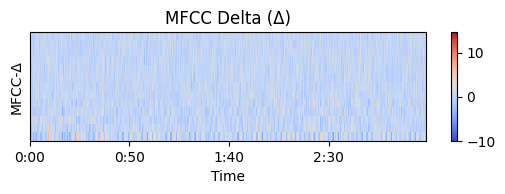

In [ ]:
mfcc_delta = librosa.feature.delta(mfccs)
plt.subplot(3, 1, 2)
librosa.display.specshow(mfcc_delta, x_axis='time',sr=sr)
plt.ylabel('MFCC-Δ')
plt.title('MFCC Delta (Δ)')
plt.colorbar()

Text(0.5, 1.0, 'MFCC Delta-Delta (ΔΔ)')

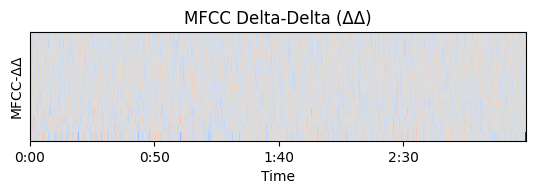

In [ ]:
mfcc_delta2 = librosa.feature.delta(mfccs, order=2)
mfcc_delta2 = librosa.feature.delta(mfccs, order=2)
plt.subplot(3, 1, 3)
librosa.display.specshow(mfcc_delta2, x_axis='time',sr=sr)
plt.ylabel('MFCC-ΔΔ')
plt.title('MFCC Delta-Delta (ΔΔ)')

[Text(0.5, 1.0, 'log Power spectrogram')]

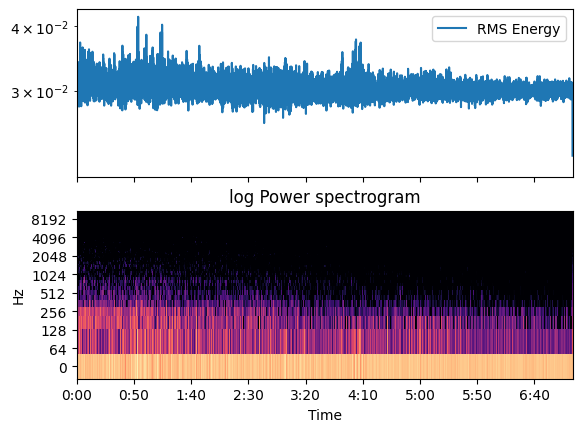

In [ ]:
rms=librosa.feature.rms(y=y)
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(rms)
ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')

In [ ]:
zcr = librosa.feature.zero_crossing_rate(y, frame_length=2048, hop_length=512)

In [ ]:
print(f"Mean Zero-Crossing Rate: {np.mean(zcr)} Hz")

Mean Zero-Crossing Rate: 2.4496502653159673e-05 Hz


In [ ]:
rows = []


for file in glob.glob("/content/gdrive/MyDrive/MARINE/*/*.wav"):
    seg_rows = extract_segments_and_log(file,
                                        out_dir="/content/gdrive/MyDrive/MARINE/features",
                                        label="marine_animal", class_id=2,
                                        segment_length=10, hop_length=10)
    rows.extend(seg_rows)


for file in glob.glob("/content/gdrive/MyDrive/vessels/*/*.wav"):
    seg_rows = extract_segments_and_log(file,
                                        out_dir="/content/gdrive/MyDrive/vessels/features",
                                        label="vessel", class_id=1,
                                        segment_length=10, hop_length=10)
    rows.extend(seg_rows)

for file in glob.glob("/content/gdrive/MyDrive/anthropogenic/*.wav"):
  seg_rows = extract_segments_and_log(file,
                                        out_dir="/content/gdrive/MyDrive/anthropogenic/features",
                                        label="other_anthropogenic", class_id=4,
                                        segment_length=10, hop_length=10)
  rows.extend(seg_rows)

for file in glob.glob("/content/gdrive/MyDrive/natural/*.wav"):
  seg_rows = extract_segments_and_log(file,
                                        out_dir="/content/gdrive/MyDrive/natural/features",
                                        label="natural_sound", class_id=3,
                                        segment_length=10, hop_length=10)
  rows.extend(seg_rows)


In [ ]:
for file in glob.glob("/content/gdrive/MyDrive/natural/*.mp3"):
  seg_rows = extract_segments_and_logmp3(file,
                                        out_dir="/content/gdrive/MyDrive/natural/features",
                                        label="natural_sound", class_id=3,
                                        segment_length=10, hop_length=10)
  rows.extend(seg_rows)

In [ ]:
for file in glob.glob("/content/gdrive/MyDrive/natural/*.mp4"):
  seg_rows = extract_segments_and_logmp4(file,
                                        out_dir="/content/gdrive/MyDrive/natural/features",
                                        label="natural_sound", class_id=3,
                                        segment_length=10, hop_length=10)
  rows.extend(seg_rows)

In [ ]:
df=pd.DataFrame(rows)


df

,feature_path,class_id,class_name,original_path,duration,segment_start,segment_dur
0,/content/gdrive/MyDrive/MARINE/features/670080...,2,marine_animal,/content/gdrive/MyDrive/MARINE/harp seal/67008...,53.788854,0.0,10
1,/content/gdrive/MyDrive/MARINE/features/670080...,2,marine_animal,/content/gdrive/MyDrive/MARINE/harp seal/67008...,53.788854,10.0,10
2,/content/gdrive/MyDrive/MARINE/features/670080...,2,marine_animal,/content/gdrive/MyDrive/MARINE/harp seal/67008...,53.788854,20.0,10
3,/content/gdrive/MyDrive/MARINE/features/670080...,2,marine_animal,/content/gdrive/MyDrive/MARINE/harp seal/67008...,53.788854,30.0,10
4,/content/gdrive/MyDrive/MARINE/features/670080...,2,marine_animal,/content/gdrive/MyDrive/MARINE/harp seal/67008...,53.788854,40.0,10
...,...,...,...,...,...,...,...
3817,/content/gdrive/MyDrive/natural/features/0f986...,3,natural_sound,/content/gdrive/MyDrive/natural/0f9867d8-fcf7-...,31.207625,10.0,10
3818,/content/gdrive/MyDrive/natural/features/0f986...,3,natural_sound,/content/gdrive/MyDrive/natural/0f9867d8-fcf7-...,31.207625,20.0,10
3819,/content/gdrive/MyDrive/natural/features/2f574...,3,natural_sound,/content/gdrive/MyDrive/natural/2f574049-3325-...,31.207625,0.0,10
3820,/content/gdrive/MyDrive/natural/features/2f574...,3,natural_sound,/content/gdrive/MyDrive/natural/2f574049-3325-...,31.207625,10.0,10


In [ ]:
df.loc[0]

,0
feature_path,/content/gdrive/MyDrive/MARINE/features/670080...
class_id,2
class_name,marine_animal
original_path,/content/gdrive/MyDrive/MARINE/harp seal/67008...
duration,53.788854
segment_start,0.0
segment_dur,10


In [ ]:
df.to_csv("metadata_segments1.csv",index=False)

<Axes: >

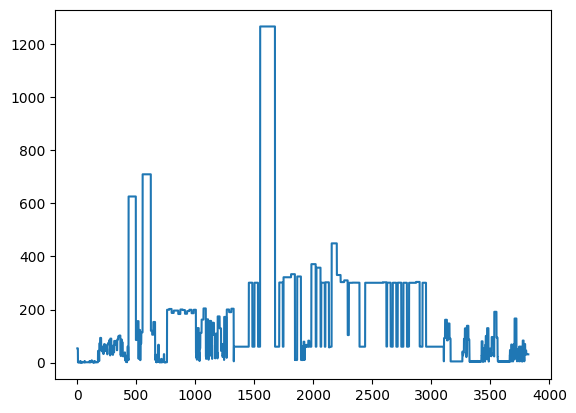

In [ ]:
df["duration"].plot()

In [ ]:
df.describe()

,class_id,duration,segment_start,segment_dur
count,3822.000000,3822.000000,3822.000000,3822.0
mean,2.971219,196.838678,92.585034,10.0
std,1.120441,249.936741,153.886967,0.0
min,1.000000,0.522312,0.000000,10.0
25%,2.000000,53.176667,0.000000,10.0
50%,3.000000,103.678104,40.000000,10.0
75%,4.000000,300.660229,120.000000,10.0
max,4.000000,1265.697688,1250.000000,10.0


array([[<Axes: title={'center': 'class_id'}>,
        <Axes: title={'center': 'duration'}>],
       [<Axes: title={'center': 'segment_start'}>,
        <Axes: title={'center': 'segment_dur'}>]], dtype=object)

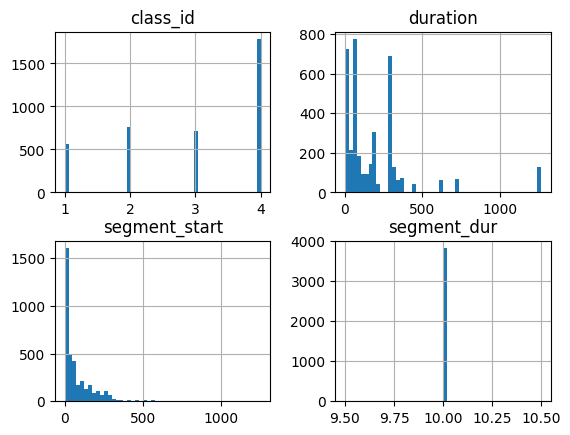

In [ ]:
df.hist(bins=50)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3822 entries, 0 to 3821
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   feature_path   3822 non-null   object 
 1   class_id       3822 non-null   int64  
 2   class_name     3822 non-null   object 
 3   original_path  3822 non-null   object 
 4   duration       3822 non-null   float64
 5   segment_start  3822 non-null   float64
 6   segment_dur    3822 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 209.1+ KB


In [ ]:
from sklearn.model_selection import train_test_split

files = df["original_path"].unique()

train_files, val_files = train_test_split(
    files, test_size=0.2, random_state=42
)


df["split"] = df["original_path"].apply(
    lambda x: "train" if x in train_files else "val"
)


train_df = df[df["split"] == "train"]
val_df   = df[df["split"] == "val"]

print("Train segments:", len(train_df), "Val segments:", len(val_df))
print("Unique train files:", train_df['original_path'].nunique())
print("Unique val files:", val_df['original_path'].nunique())


Train segments: 3162 Val segments: 660
Unique train files: 801
Unique val files: 201


In [ ]:
import torch
import numpy as np

class AudioDataset(torch.utils.data.Dataset):
    def __init__(self, df):
        self.df = df.reset_index(drop=True)

    def __len__(self): return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        data = np.load(row.feature_path)
        mel = data["mel"]
        mel = torch.tensor(mel, dtype=torch.float32).unsqueeze(0)
        label = torch.tensor(row.class_id - 1, dtype=torch.long)

        return mel, label


In [ ]:
data = np.load(df.iloc[0].feature_path)
mel = data["mel"]
mel.shape

(128, 938)

In [ ]:
import torch.optim as optim

from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

train_dataset = AudioDataset(train_df)
val_dataset   = AudioDataset(val_df)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader   = torch.utils.data.DataLoader(val_dataset, batch_size=16, shuffle=False)

model = CNNWithGAP(n_classes=4)


class_counts = train_df["class_id"].value_counts().sort_index()

weights = 1.0 / torch.tensor(class_counts.values, dtype=torch.float)
weights = weights / weights.sum()   # normalize (optional)

print("Class counts:", class_counts.tolist())
print("Class weights:", weights.tolist())

criterion = nn.CrossEntropyLoss(weight=weights)

optimizer = optim.Adam(model.parameters(), lr=1e-4)

from sklearn.metrics import accuracy_score

num_epochs = 10
train_losses, val_losses, val_accuracies = [], [], []
best_val_loss = float("inf")
best_epoch = -1
for epoch in range(num_epochs):
    # ---- Training ----
    model.train()
    running_loss = 0
    for X, y in train_loader:
        optimizer.zero_grad()
        out = model(X)
        loss = criterion(out, y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # ---- Validation ----
    model.eval()
    val_loss, preds, labels = 0, [], []
    with torch.no_grad():
        for X, y in val_loader:
            out = model(X)
            loss = criterion(out, y)
            val_loss += loss.item()
            preds.extend(out.argmax(dim=1).cpu().numpy())
            labels.extend(y.cpu().numpy())
    val_loss /= len(val_loader)
    val_acc = accuracy_score(labels, preds)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}/{num_epochs}: "
          f"train_loss={train_loss:.4f}, val_loss={val_loss:.4f}, val_acc={val_acc:.3f}")
    # ---- Confusion Matrix ----
    cm = confusion_matrix(labels, preds)
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    print(f"train_loss={train_loss:.4f}, val_loss={val_loss:.4f}, val_acc={val_acc:.3f}")
    print("Confusion matrix:\n", cm)
    # ---- Save best checkpoint ----
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_epoch = epoch+1
        torch.save(model.state_dict(), "ps12_cnn_best.pth")
        print(f"✅ Saved new best model at epoch {best_epoch} (val_loss={best_val_loss:.4f})")



Class counts: [459, 628, 583, 1492]
Class weights: [0.35387712717056274, 0.2586458921432495, 0.278609961271286, 0.10886703431606293]
Epoch 1/10: train_loss=1.0395, val_loss=0.5772, val_acc=0.806

Epoch 1/10
train_loss=1.0395, val_loss=0.5772, val_acc=0.806
Confusion matrix:
 [[ 87   0   3  16]
 [ 39  79   4  10]
 [ 24   0  82  28]
 [  4   0   0 284]]
✅ Saved new best model at epoch 1 (val_loss=0.5772)
Epoch 2/10: train_loss=0.4691, val_loss=0.3122, val_acc=0.924

Epoch 2/10
train_loss=0.4691, val_loss=0.3122, val_acc=0.924
Confusion matrix:
 [[ 87   0  19   0]
 [  0 126   6   0]
 [ 15   6 111   2]
 [  0   2   0 286]]
✅ Saved new best model at epoch 2 (val_loss=0.3122)
Epoch 3/10: train_loss=0.2993, val_loss=0.2808, val_acc=0.902

Epoch 3/10
train_loss=0.2993, val_loss=0.2808, val_acc=0.902
Confusion matrix:
 [[ 87   0  19   0]
 [  0 130   2   0]
 [ 11  29  92   2]
 [  0   2   0 286]]
✅ Saved new best model at epoch 3 (val_loss=0.2808)
Epoch 4/10: train_loss=0.1896, val_loss=0.2255, val

In [ ]:
for X, y in train_loader:
    print("Unique labels:", y.unique())
    break

Unique labels: tensor([0, 1, 2, 3])


In [ ]:
sample = np.load(train_df.iloc[0].feature_path)
mel = sample["mel"]
print(mel.min(), mel.max(), mel.mean(), mel.std())


-80.0 0.0 -52.35001 15.028245


In [ ]:
from sklearn.metrics import accuracy_score

model.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for X, y in val_loader:
        out = model(X)
        preds = out.argmax(1)
        all_preds.extend(preds.tolist())
        all_labels.extend(y.tolist())

print("Validation Accuracy:", accuracy_score(all_labels, all_preds))


Validation Accuracy: 0.946969696969697


In [ ]:
print(train_df['class_name'].value_counts())
print(val_df['class_name'].value_counts())


class_name
other_anthropogenic    1492
marine_animal           628
natural_sound           583
vessel                  459
Name: count, dtype: int64
class_name
other_anthropogenic    288
natural_sound          134
marine_animal          132
vessel                 106
Name: count, dtype: int64


In [ ]:

torch.save(model.state_dict(), "best_cnn.pth")


In [ ]:
import librosa
import torch
import numpy as np

import librosa
import numpy as np
import torch

def predict_audio(file, model, sr=48000):

    y, _ = librosa.load(file, sr=sr, mono=True)


    mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    mel_db = librosa.power_to_db(mel, ref=np.max)


    mel_db = (mel_db - mel_db.mean()) / (mel_db.std() + 1e-6)

    X = torch.tensor(mel_db).unsqueeze(0).unsqueeze(0).float()

    # Forward pass
    with torch.no_grad():
        out = model(X)
        probs = torch.softmax(out, dim=1).cpu().numpy()[0]
        pred_class = int(np.argmax(probs))

    return pred_class, probs

file_path = "/content/gdrive/MyDrive/cde82ded-68b8-4c67-b6c3-9ab190908357.mp3"
pred_class, probs = predict_audio(file_path, model)

class_map = {0: "vessel", 1: "marine_animal"}
print("Predicted:", class_map[pred_class])
print("Probabilities:", probs)


In [ ]:
# Data Augmentation
src_dir = "/content/gdrive/MyDrive/natural"
dst_dir = "/content/gdrive/MyDrive/Natural_Augmented"
os.makedirs(dst_dir, exist_ok=True)

def extract_audio_to_wav(in_path, out_wav, sr=48000):
    cmd = ["ffmpeg", "-y", "-i", in_path, "-vn", "-ac", "1", "-ar", str(sr), out_wav]
    subprocess.run(cmd, check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    return out_wav

def augment_once(y, sr):
    n_steps = random.choice([-2, -1, 0, 1, 2])
    y_pitch = librosa.effects.pitch_shift(y=y, sr=sr, n_steps=n_steps)

    rate = random.uniform(0.7, 1.3)
    y_stretch = librosa.effects.time_stretch(y=y_pitch, rate=rate)

    sig_std = float(np.std(y_stretch)) or 1.0
    noise = np.random.normal(0.0, 0.01 * sig_std, size=y_stretch.shape)
    y_noisy = y_stretch + noise

    peak = np.max(np.abs(y_noisy))
    if peak > 1.0:
        y_noisy = y_noisy / peak
    return y_noisy, n_steps, rate

exts = (".wav", ".mp3", ".mp4")
media = sorted([f for f in os.listdir(src_dir) if f.lower().endswith(exts)])

for fname in media:
    in_path = os.path.join(src_dir, fname)
    stem = Path(fname).stem
    tmp_wav = None
    try:
        if fname.lower().endswith((".wav", ".mp3")):
            y, sr = librosa.load(in_path, sr=48000, mono=True)
        else:
            tmp_wav = os.path.join(src_dir, stem + "__tmp_extract_48k_mono.wav")
            extract_audio_to_wav(in_path, tmp_wav, sr=48000)
            y, sr = librosa.load(tmp_wav, sr=48000, mono=True)

        if y.size == 0:
            print(f"Skipping empty audio: {fname}")
            continue

        y_aug, n_steps, rate = augment_once(y, sr)
        out_name = f"{stem}__aug_ps{n_steps}_ts{rate:.2f}.wav"
        out_path = os.path.join(dst_dir, out_name)
        sf.write(out_path, y_aug, sr, subtype="PCM_16")
        print(f"Saved: {out_name}")
    except subprocess.CalledProcessError as e:
        print(f"ffmpeg failed for {fname}: {e}")
    except Exception as e:
        print(f"Failed {fname}: {e}")
    finally:
        if tmp_wav and os.path.exists(tmp_wav):
            try:
                os.remove(tmp_wav)
            except Exception:
                pass



Saved: 0f9867d8-fcf7-40d1-b846-3f7fb8100eb7__aug_ps0_ts0.78.wav
Saved: 2b68b3a9-7c0d-4452-bbe5-cc99b5d4fb61__aug_ps0_ts0.82.wav
Saved: 2f574049-3325-446c-a8ac-2e5b31e9e32f__aug_ps-2_ts1.29.wav
Saved: 30679527-fd7a-4cad-8c7d-cb1bcc07604d__aug_ps-2_ts1.08.wav
Saved: Beach of Kattegat - Soft Waves__aug_ps0_ts0.93.wav
Saved: Eyrarsund - Uproar Waves__aug_ps2_ts1.00.wav
Saved: Ice-Calving-AWI-Van-Opzeeland-03-ice-calving-clip__aug_ps2_ts0.90.wav
Saved: Ice-singing-AWI-Van-Opzeeland-02-ice-singing-clip__aug_ps0_ts1.25.wav
Saved: Little Belt - Coastal Wildscape pt. 1__aug_ps-2_ts0.84.wav
Saved: Quake-NOAA-Kline-01-amplified-LPfilter200-earthquake-clip__aug_ps-1_ts0.88.wav
Saved: Quiet-AWI-Van-Opzeeland-02-quiet-ocean-clip__aug_ps-2_ts0.93.wav
Saved: Rain-GRNMS-NOAA-PAGroup-02-rain-clip__aug_ps2_ts1.11.wav
Saved: SB20100319160448__aug_ps-2_ts0.99.wav
Saved: SB20100319202736__aug_ps1_ts0.75.wav
Saved: SB20100320092134__aug_ps2_ts0.89.wav
Saved: SB20100320134045__aug_ps1_ts0.94.wav
Saved: SB2010